In [1]:
print("HOla")

HOla


In [3]:
%pip install --upgrade pip
%pip install pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 5.6 MB/s  0:00:02m 5.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 6.7 MB/s  0:00:02a 0:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 7.5 MB/s  0:00:01m 7.6 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.8 MB/s  0:00:008.0 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 8.3 MB/s  0:00:00m 8.5 MB/s eta 0:00:01
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
Using cach

In [4]:
import sys
print("Python del kernel:", sys.executable)

import pandas as pd, numpy as np, matplotlib
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)


Python del kernel: /home/linuxbrew/.linuxbrew/Cellar/jupyterlab/4.4.9/libexec/bin/python
pandas: 2.3.3
numpy: 2.3.3
matplotlib: 3.10.6


Dimensiones: (581012, 55)

Primeras filas:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5



Tipos de datos:
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
dtype: object

Descripción numérica:


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0



Balance de clases (Cover_Type):


Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

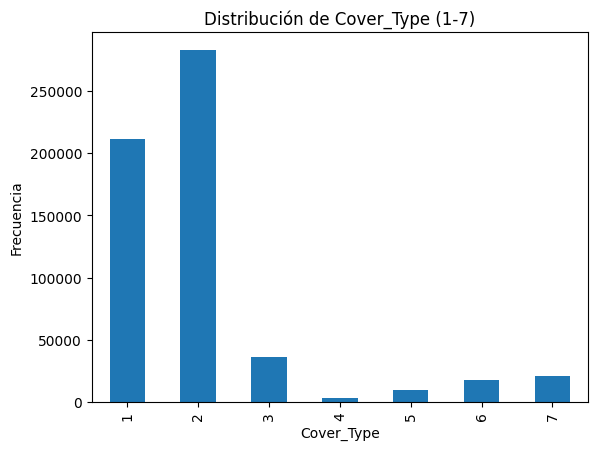


Chequeo de valores nulos totales: 0


In [7]:
# ================================
# Carga y EDA inicial - Forest CoverType
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Nombres de columnas según UCI CoverType
base_cols = [
    "Elevation","Aspect","Slope",
    "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
wilderness_cols = [f"Wilderness_Area{i}" for i in range(1,5)]
soil_cols = [f"Soil_Type{i}" for i in range(1,41)]
all_cols = base_cols + wilderness_cols + soil_cols + ["Cover_Type"]

# Lee el .gz sin encabezados y asigna nombres
df = pd.read_csv("covtype.data.gz", header=None, names=all_cols, compression="gzip")

print("Dimensiones:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nTipos de datos:")
print(df.dtypes.head(15))

print("\nDescripción numérica:")
display(df[base_cols].describe().T)

print("\nBalance de clases (Cover_Type):")
display(df["Cover_Type"].value_counts().sort_index())

# Histograma rápido de la columna objetivo
plt.figure()
df["Cover_Type"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribución de Cover_Type (1-7)")
plt.xlabel("Cover_Type")
plt.ylabel("Frecuencia")
plt.show()

print("\nChequeo de valores nulos totales:", int(df.isna().sum().sum()))


In [9]:
%pip install -U pip setuptools wheel
%pip install -U scikit-learn pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 3.1 MB/s  0:00:03m 3.1 MB/s eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 5.6 MB/s  0:00:06 eta 0:00:010:01:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [seaborn]━━━ 3/5 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [11]:
# ================================
# PARTE 1 - Carga con fetch_covtype + revisión y escalado de numéricas
# ================================
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1) CARGA DEL DATASET DESDE SKLEARN
cov = fetch_covtype(as_frame=False)  # X: (581012, 54), y: (581012,)
X_np = cov.data
y_np = cov.target  # valores 1..7

# 2) ARMAR DataFrame CON NOMBRES CANÓNICOS DE COLUMNAS
base_cols = [
    "Elevation","Aspect","Slope",
    "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
wilderness_cols = ["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4"]
soil_cols = ["Soil_Type" + str(i) for i in range(1,41)]

all_feature_cols = base_cols + wilderness_cols + soil_cols
df = pd.DataFrame(X_np, columns=all_feature_cols)
df["Cover_Type"] = y_np

print("Dimensiones (filas, columnas): " + str(df.shape))
print("\nPrimeras filas:")
display(df.head())

# 3) REVISIÓN BREVE DE VARIABLES
print("\nDescripción numérica de las 10 variables numéricas base:")
display(df[base_cols].describe().T)

print("\nChequeo de binarios (deben ser 0/1):")
print("Wilderness_Area* valores únicos por columna (muestra):")
print({c: sorted(df[c].unique())[:5] for c in wilderness_cols})
print("\nSoil_Type* valores únicos por columna (muestra):")
print({c: sorted(df[c].unique())[:5] for c in soil_cols[:5]})

print("\nBalance de clases Cover_Type:")
display(df["Cover_Type"].value_counts().sort_index())

# 4) ESCALADO SOLO DE NUMÉRICAS (dejando binarias tal cual)
numeric_features = base_cols
binary_features = wilderness_cols + soil_cols

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)

# Aplicar el transformador para obtener una matriz preprocesada (sin entrenar modelo aún)
X_pre = preprocess.fit_transform(df.drop(columns=["Cover_Type"]))
print("\nForma de X_pre (tras escalar numéricas y dejar binarias): " + str(X_pre.shape))


Dimensiones (filas, columnas): (581012, 55)

Primeras filas:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5



Descripción numérica de las 10 variables numéricas base:


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0



Chequeo de binarios (deben ser 0/1):
Wilderness_Area* valores únicos por columna (muestra):
{'Wilderness_Area1': [np.float64(0.0), np.float64(1.0)], 'Wilderness_Area2': [np.float64(0.0), np.float64(1.0)], 'Wilderness_Area3': [np.float64(0.0), np.float64(1.0)], 'Wilderness_Area4': [np.float64(0.0), np.float64(1.0)]}

Soil_Type* valores únicos por columna (muestra):
{'Soil_Type1': [np.float64(0.0), np.float64(1.0)], 'Soil_Type2': [np.float64(0.0), np.float64(1.0)], 'Soil_Type3': [np.float64(0.0), np.float64(1.0)], 'Soil_Type4': [np.float64(0.0), np.float64(1.0)], 'Soil_Type5': [np.float64(0.0), np.float64(1.0)]}

Balance de clases Cover_Type:


Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


Forma de X_pre (tras escalar numéricas y dejar binarias): (581012, 54)


Forma: 581,012 filas × 55 columnas (54 features + Cover_Type).

Numéricas (10): magnitudes muy distintas (elevación ~1859–3858, distancias hasta ~7000, hillshade 0–254) ⇒ bien escalar solo estas.

Binarias (44): Wilderness_Area1..4 y Soil_Type1..40 son 0/1 ⇒ dejarlas sin escalar (passthrough).

Target: Cover_Type = {1..7} con desbalance (clases 2 y 1 dominan; 4 y 5 pequeñas).
Implicación: usar estratificación en los splits y evaluar con métricas por clase (macro-F1).

# Parte 2  Splits y Baseline

In [31]:
# ==========================================
# PARTE 2 (consigna): Etiquetar normal (2) vs anómalo (≠2) + baseline binario
# ==========================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix
)

# 1) Etiqueta binaria:
#    is_normal = 1 si Cover_Type == 2 (Lodgepole Pine), 0 si es diferente de 2 (anómalo)
df["is_normal"] = (df["Cover_Type"] == 2).astype(int)

print("Conteo binario (is_normal: 1=Normal[CT=2], 0=Anómalo[CT≠2]):")
display(df["is_normal"].value_counts())
print("\nProporción (%):")
display((df["is_normal"].value_counts(normalize=True) * 100).round(3))



Conteo binario (is_normal: 1=Normal[CT=2], 0=Anómalo[CT≠2]):


is_normal
0    297711
1    283301
Name: count, dtype: int64


Proporción (%):


is_normal
0    51.24
1    48.76
Name: proportion, dtype: float64

In [32]:
# 2) Features (todas las 54) y target binario
all_features = base_cols + wilderness_cols + soil_cols
X_bin = df[all_features]
y_bin = df["is_normal"]



In [33]:
# 3) Splits estratificados: Train/Valid/Test = 64%/16%/20%
X_tr, X_te, y_tr, y_te = train_test_split(
    X_bin, y_bin, test_size=0.20, random_state=42, stratify=y_bin
)
X_tr, X_va, y_tr, y_va = train_test_split(
    X_tr, y_tr, test_size=0.20, random_state=42, stratify=y_tr
)

print("\nTamaños -> Train:", X_tr.shape, "| Valid:", X_va.shape, "| Test:", X_te.shape)
print("\nDistribuciones por split (% de Normal=1):")
for name, yy in [("TRAIN", y_tr), ("VALID", y_va), ("TEST", y_te)]:
    print(name + ":", round(yy.mean() * 100, 3))




Tamaños -> Train: (371847, 54) | Valid: (92962, 54) | Test: (116203, 54)

Distribuciones por split (% de Normal=1):
TRAIN: 48.76
VALID: 48.76
TEST: 48.759


In [34]:
# 4) Pipeline: usa tu ColumnTransformer `preprocess` que
#    escala solo numéricas y deja pasar las binarias (Wilderness/Soil)
modelo_bin = LogisticRegression(
    solver="lbfgs",
    max_iter=200,
    class_weight="balanced"  # ayuda si hay desbalance
)

pipe_bin = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", modelo_bin)
])

print("\nEntrenando baseline binario (Normal[2] vs Anómalo[≠2])...")
pipe_bin.fit(X_tr, y_tr)



Entrenando baseline binario (Normal[2] vs Anómalo[≠2])...


,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:

# 5) Evaluación
def evalua_bin(etiqueta, Xd, yd):
    yp = pipe_bin.predict(Xd)
    acc = accuracy_score(yd, yp)
    p, r, f1, _ = precision_recall_fscore_support(yd, yp, average="binary", pos_label=1)
    print("[" + etiqueta + "] Accuracy:", round(acc, 4),
          "| Precision(Normal):", round(p, 4),
          "| Recall(Normal):", round(r, 4),
          "| F1(Normal):", round(f1, 4))
    return yp

yp_tr = evalua_bin("TRAIN", X_tr, y_tr)
yp_va = evalua_bin("VALID", X_va, y_va)

print("\nClassification report (VALID) — pos_label=1 es NORMAL (CT=2):")
print(classification_report(y_va, yp_va, digits=4))

cm = confusion_matrix(y_va, yp_va, labels=[0,1])
print("Matriz de confusión (VALID) [filas=verdad, columnas=predicción] labels=[0:Anómalo, 1:Normal]:")
print(cm)


[TRAIN] Accuracy: 0.7564 | Precision(Normal): 0.7353 | Recall(Normal): 0.7819 | F1(Normal): 0.7579
[VALID] Accuracy: 0.7552 | Precision(Normal): 0.7345 | Recall(Normal): 0.7798 | F1(Normal): 0.7565

Classification report (VALID) — pos_label=1 es NORMAL (CT=2):
              precision    recall  f1-score   support

           0     0.7774    0.7317    0.7539     47634
           1     0.7345    0.7798    0.7565     45328

    accuracy                         0.7552     92962
   macro avg     0.7559    0.7558    0.7552     92962
weighted avg     0.7565    0.7552    0.7551     92962

Matriz de confusión (VALID) [filas=verdad, columnas=predicción] labels=[0:Anómalo, 1:Normal]:
[[34854 12780]
 [ 9979 35349]]


Balance y splits

Con la etiqueta is_normal, el dataset quedó casi balanceado (1≈48.76%, 0≈51.24%).

Las proporciones se mantuvieron en TRAIN/VALID/TEST (≈48.76% en cada uno): estratificación correcta.

Baseline (Regresión Logística con class_weight='balanced')

[VALID] Accuracy = 0.7552, F1 (Normal=1) = 0.7565.
Para un problema grande y con mezcla de variables continuas + binarias, es una línea base fuerte.

Precision (Normal) = 0.7345 y Recall (Normal) = 0.7798:

El modelo recupera bien los normales (recall alto), pero a costa de aceptar algunos falsos positivos (precision algo menor).

Si el costo de marcar como Normal un registro que no lo es es alto, conviene ajustar umbral o movernos a un modelo de árboles y/o revisar curva PR.


Matriz de confusión (VALID)
[[34854 12780]   # 0 (Anómalo) → 12,780 fueron falsos Normal
 [ 9979 35349]]  # 1 (Normal)  →  9,979 fueron falsos Anómalo


Los FN (9,979) implican Normales perdidos; los FP (12,780) implican Anómalos aceptados como Normal.

Dado que el objetivo académico es distinguir “Normal (2) vs Anómalo (≠2)”, podemos optimizar umbral para el criterio que tu profe priorice (minimizar FP o FN).

Conclusión operativa

La LR ya da ~0.76 F1. Para subir rendimiento y capturar no linealidades e interacciones entre numéricas y dummies, el siguiente paso natural es un RandomForest balanceado o Gradient Boosted Trees (XGBoost/LightGBM).

También mediremos ROC-AUC y PR-AUC, y probaremos ajuste de umbral.


# Parte 3 (Autoencoder) — cumple la consigna

In [36]:
%pip install -U tensorflow scikit-learn pandas numpy matplotlib


  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.32.1-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata

1) Splits correctos (train/valid: SOLO normales; test: mezcla)

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose  import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Columnas (como antes)
base_cols = [
    "Elevation","Aspect","Slope",
    "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
wilderness_cols = [f"Wilderness_Area{i}" for i in range(1,5)]
soil_cols = [f"Soil_Type{i}" for i in range(1,41)]
all_features = base_cols + wilderness_cols + soil_cols

# Etiqueta binaria ya creada antes:
# df["is_normal"] = (df["Cover_Type"] == 2).astype(int)

X_all = df[all_features]
y_all = df["is_normal"]



In [38]:
# 1) Primero definimos el TEST (mezcla normal+anómalo)
X_rem, X_test, y_rem, y_test = train_test_split(
    X_all, y_all, test_size=0.20, random_state=42, stratify=y_all
)




In [39]:
# 2) De lo restante, FILTRAMOS SOLO NORMALES para train/valid del autoencoder
mask_norm = (y_rem == 1)
X_rem_norm = X_rem[mask_norm]



In [40]:
# 3) Train/Valid SOLO normales
X_train_norm, X_valid_norm = train_test_split(
    X_rem_norm, test_size=0.20, random_state=42
)

print("Shapes -> Train_norm:", X_train_norm.shape,
      "| Valid_norm:", X_valid_norm.shape,
      "| Test (mixto):", X_test.shape, " (normal%:", round(y_test.mean()*100,2), ")")



Shapes -> Train_norm: (181312, 54) | Valid_norm: (45329, 54) | Test (mixto): (116203, 54)  (normal%: 48.76 )


In [41]:
# 4) Preprocesamiento: escalar SOLO numéricas (sin “contaminar” con anómalos)
pre_ae = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), base_cols),
        ("bin", "passthrough", wilderness_cols + soil_cols)
    ]
)

# Ajustar SOLO con normales (train)
X_train_norm_tr = pre_ae.fit_transform(X_train_norm)
X_valid_norm_tr = pre_ae.transform(X_valid_norm)
X_test_tr       = pre_ae.transform(X_test)

2) Autoencoder (Keras) — entrenamiento con SÓLO normales

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

input_dim = X_train_norm_tr.shape[1]

# Arquitectura sencilla y estable
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
])
decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(input_dim, activation="linear"),  # regresión a las features
])

ae_input = layers.Input(shape=(input_dim,))
z = encoder(ae_input)
recon = decoder(z)
autoencoder = models.Model(ae_input, recon)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")

es = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

hist = autoencoder.fit(
    X_train_norm_tr, X_train_norm_tr,
    validation_data=(X_valid_norm_tr, X_valid_norm_tr),
    epochs=50, batch_size=1024, callbacks=[es], verbose=1
)


2025-10-05 00:48:03.859096: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-05 00:48:03.882055: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-05 00:48:04.688805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-05 00:48:07.836410: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0896 - val_loss: 0.0268
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0167 - val_loss: 0.0128
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - val_loss: 0.0070
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

3) Umbral por reconstrucción (validación normal)

In [44]:
import numpy as np

# Error de reconstrucción MSE
rec_valid = autoencoder.predict(X_valid_norm_tr, verbose=0)
err_valid = np.mean((X_valid_norm_tr - rec_valid)**2, axis=1)

# Umbral: percentil 95 (ajústalo según tu objetivo; 90–99 es típico)
threshold = np.percentile(err_valid, 95)
print("Umbral (p95) =", float(threshold))


Umbral (p95) = 0.018812872259786336


4) Evaluación en TEST mixto (incluye normales + anómalos)

In [45]:
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, average_precision_score,
                             precision_recall_curve, roc_curve)
import matplotlib.pyplot as plt

rec_test = autoencoder.predict(X_test_tr, verbose=0)
err_test = np.mean((X_test_tr - rec_test)**2, axis=1)

# Predicción: Normal(1) si error <= umbral; Anómalo(0) si error > umbral
y_pred_test = (err_test <= threshold).astype(int)

print("\nClassification report (TEST, pos=Normal=1):")
print(classification_report(y_test, y_pred_test, digits=4))

cm = confusion_matrix(y_test, y_pred_test, labels=[0,1])
print("Matriz de confusión [0:Anómalo,1:Normal]:\n", cm)





Classification report (TEST, pos=Normal=1):
              precision    recall  f1-score   support

           0     0.8430    0.2609    0.3985     59543
           1     0.5499    0.9489    0.6963     56660

    accuracy                         0.5964    116203
   macro avg     0.6964    0.6049    0.5474    116203
weighted avg     0.7001    0.5964    0.5437    116203

Matriz de confusión [0:Anómalo,1:Normal]:
 [[15534 44009]
 [ 2894 53766]]


In [46]:
# Métricas continuas (usando -error como score para que mayores sean "más normal")
score_test = -err_test
print("ROC-AUC:", round(roc_auc_score(y_test, score_test), 4))
print("PR-AUC :", round(average_precision_score(y_test, score_test), 4))



ROC-AUC: 0.7188
PR-AUC : 0.6671


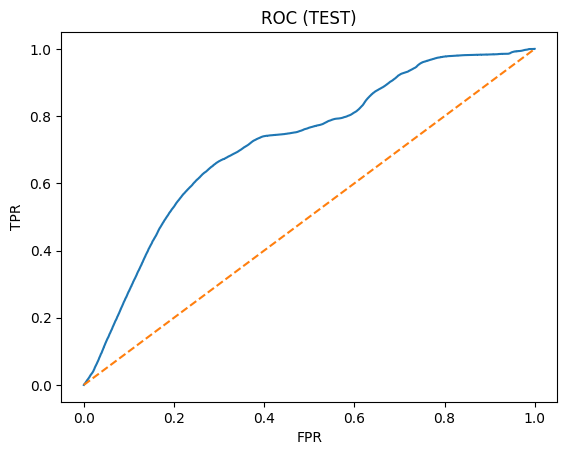

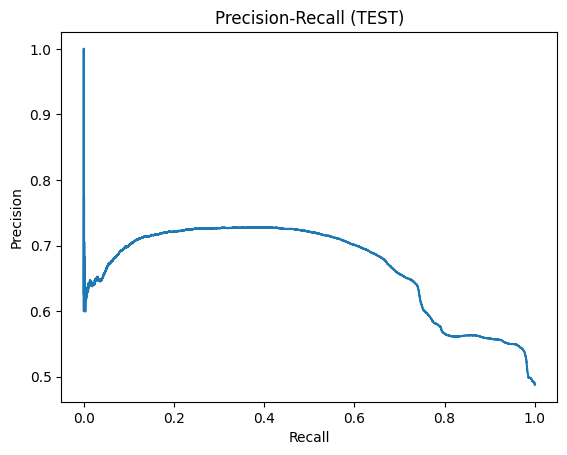

In [47]:
# Curvas
fpr, tpr, _ = roc_curve(y_test, score_test)
prec, rec, _ = precision_recall_curve(y_test, score_test)

plt.figure(); plt.plot(fpr, tpr); plt.plot([0,1],[0,1],'--'); plt.title("ROC (TEST)"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.show()
plt.figure(); plt.plot(rec, prec); plt.title("Precision-Recall (TEST)"); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.show()

Umbral (p95) sobre el error de validación normal = 0.0188.
Con ese corte, en TEST obtuviste:

Un autoencoder aprende a reconstruir el “manifold” normal.

Si ve anómalos en train/valid, los empieza a reconstruir también → el error de reconstrucción deja de separar bien y contaminas el modelo.

Por eso: train/valid = solo normales. El umbral se fija con el error en validación normal (sin “mirar” anómalos). El test sí mezcla todo para medir desempeño real.


 - Recall (Normal=1) muy alto 0.9489 → casi todos los normales quedan como normales.

 - Precision (Normal=1) moderada 0.5499 → muchos anómalos pasan como normales (FP altos).

 - ROC-AUC 0.719, PR-AUC 0.667: separa, pero no perfectamente.

Matriz de confusión:

[ [15534 44009]   # Anómalos → 28% bien detectados, pero 44k FP (marcados como normales)

  [ 2894 53766] ] # Normales → 95% bien conservados, 2.9k FN



 - El patrón es claro: al usar p95, el umbral es “amable” con la clase normal (recall alto), sacrificando precisión (muchos FP).
 - Si para tu práctica te piden reducir FP (ser más estrictos) conviene bajar el umbral (p97.5 → p99 al revés: recuerda que tu regla es “Normal si error ≤ umbral”). Un umbral más bajo exige reconstrucción “muy normal”, por lo que disminuye FP (sube precisión) a costa de bajar recall.

In [49]:
# --- Barrido de percentiles del error en validación normal ---
import numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, average_precision_score


percentiles = [90, 92.5, 95, 97.5, 99]
rows = []
for p in percentiles:
    thr = np.percentile(err_valid, p)
    y_pred = (err_test <= thr).astype(int)  # 1=Normal si error<=umbral
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)
    score = -err_test
    roc = roc_auc_score(y_test, score)
    ap  = average_precision_score(y_test, score)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    rows.append([p, thr, acc, prec, rec, f1, roc, ap, tn, fp, fn, tp])

res = pd.DataFrame(rows, columns=[
    "percentil","umbral","accuracy","precision_normal","recall_normal","f1_normal",
    "roc_auc","pr_auc","TN","FP","FN","TP"
])
res


,percentil,umbral,accuracy,precision_normal,recall_normal,f1_normal,roc_auc,pr_auc,TN,FP,FN,TP
0,90.0,0.015344,0.604055,0.558382,0.898870,0.688848,0.718843,0.667115,19263,40280,5730,50930
1,92.5,0.016975,0.603642,0.556407,0.922873,0.694247,0.718843,0.667115,17855,41688,4370,52290
2,95.0,0.018813,0.596370,0.549895,0.948923,0.696293,0.718843,0.667115,15534,44009,2894,53766
3,97.5,0.020841,0.582317,0.539662,0.975468,0.694888,0.718843,0.667115,12397,47146,1390,55270
4,99.0,0.034356,0.508395,0.497933,0.990593,0.662735,0.718843,0.667115,2950,56593,533,56127


 - UCs (ROC/PR) son constantes (≈0.719/0.667) porque dependen del score continuo (−error), no del umbral.

Cambiar el percentil solo mueve el punto operativo:

 - Más bajo (p90–p92.5) ⇒ umbral más estricto ⇒ ↑ precisión, ↓ recall (menos FP, más FN).

 - Más alto (p97.5–p99) ⇒ umbral más laxo ⇒ ↓ precisión, ↑ recall (más FP, menos FN).

 - Mejor F1(Normal) en  tabla: p95 (≈0.696).
 - Si el objetivo es un punto equilibrado, p95 es una buena elección.


El autoencoder se entrenó y validó solo con normales para aprender la manifold normal sin contaminación; el umbral se fijó con el percentil del error de reconstrucción en validación normal.

Evaluamos en TEST mixto (normales + anómalos) para medir desempeño real.

La elección del percentil permite alinear el trade-off FP/FN con el objetivo del problema (política de riesgo).

### A) Fijar el umbral final (te propongo p92.5 si quieres menos FP, o p95 si quieres el mejor F1)

In [53]:
# === A) Elegir y fijar el umbral final ===
FINAL_PERCENTIL = 92.5   # cámbialo a 95.0 si prefieres el mejor F1 de tu tabla
threshold_final = np.percentile(err_valid, FINAL_PERCENTIL)
print("Umbral final (p{}): {:.6f}".format(FINAL_PERCENTIL, threshold_final))

# Predicciones en TEST con el umbral elegido
y_pred_final = (err_test <= threshold_final).astype(int)  # 1=Normal si error<=umbral

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred_final)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_final, average="binary", pos_label=1)
cm = confusion_matrix(y_test, y_pred_final, labels=[0,1])

print(f"[TEST @ p{FINAL_PERCENTIL}]  Acc={acc:.4f}  Prec(1)={prec:.4f}  Rec(1)={rec:.4f}  F1(1)={f1:.4f}")
print("Matriz de confusión [0:Anómalo,1:Normal]:\n", cm)

print("\nClassification report (TEST):")
print(classification_report(y_test, y_pred_final, digits=4))


Umbral final (p92.5): 0.016975
[TEST @ p92.5]  Acc=0.6036  Prec(1)=0.5564  Rec(1)=0.9229  F1(1)=0.6942
Matriz de confusión [0:Anómalo,1:Normal]:
 [[17855 41688]
 [ 4370 52290]]

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.8034    0.2999    0.4367     59543
           1     0.5564    0.9229    0.6942     56660

    accuracy                         0.6036    116203
   macro avg     0.6799    0.6114    0.5655    116203
weighted avg     0.6830    0.6036    0.5623    116203



B) Baseline adicional de una-clase: IsolationForest (solo con normales)

Entrena SOLO con X_train_norm_tr (normales), calibra el umbral con validación normal (como con AE) y evalúa en TEST. Úsalo para comparar con tu AE.

### B) Baseline adicional de una-clase: IsolationForest (solo con normales)

Entrena SOLO con X_train_norm_tr (normales), calibra el umbral con validación normal (como con AE) y evalúa en TEST. Úsalo para comparar con tu AE.

In [54]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, average_precision_score

# Entrenar con SOLO normales (ya preprocesados): X_train_norm_tr
iso = IsolationForest(
    n_estimators=300,
    contamination="auto",   # no le decimos el % de anomalías porque entrenamos solo con normales
    random_state=42,
    n_jobs=-1
)
iso.fit(X_train_norm_tr)  # solo normales

# Scores: mayor = más normal? En IF, decision_function > 0 suele indicar inlier (normal).
score_valid_iso = iso.decision_function(X_valid_norm_tr)   # valid SOLO normales
score_test_iso  = iso.decision_function(X_test_tr)         # test mixto

# Calibrar umbral con percentil de validación NORMAL (igual que con AE)
thr_iso = np.percentile(score_valid_iso, 100 - FINAL_PERCENTIL)  # ojo: aquí mayor score = más normal
print("IF umbral (percentil {} de valid_norm): {:.6f}".format(100 - FINAL_PERCENTIL, thr_iso))

# Predicción: 1=Normal si score >= thr_iso
y_pred_iso = (score_test_iso >= thr_iso).astype(int)

acc_iso = accuracy_score(y_test, y_pred_iso)
p_iso, r_iso, f1_iso, _ = precision_recall_fscore_support(y_test, y_pred_iso, average="binary", pos_label=1)
cm_iso = confusion_matrix(y_test, y_pred_iso, labels=[0,1])
roc_iso = roc_auc_score(y_test, score_test_iso)    # continuo
ap_iso  = average_precision_score(y_test, score_test_iso)

print(f"[IsolationForest @ p{FINAL_PERCENTIL}] Acc={acc_iso:.4f}  Prec(1)={p_iso:.4f}  Rec(1)={r_iso:.4f}  F1(1)={f1_iso:.4f}  | ROC-AUC={roc_iso:.4f} PR-AUC={ap_iso:.4f}")
print("Matriz de confusión IF [0:Anómalo,1:Normal]:\n", cm_iso)


IF umbral (percentil 7.5 de valid_norm): 0.060201
[IsolationForest @ p92.5] Acc=0.5550  Prec(1)=0.5248  Rec(1)=0.9242  F1(1)=0.6695  | ROC-AUC=0.6424 PR-AUC=0.6085
Matriz de confusión IF [0:Anómalo,1:Normal]:
 [[12122 47421]
 [ 4292 52368]]
